In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import ipywidgets as widgets
from ipywidgets import interact

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from anomaly_detectors import detect_freeze

sns.set(style="whitegrid", context="notebook", rc={"figure.figsize":(14,10)})

In [3]:
dataset_train = pd.read_csv(os.path.join("data", "train.csv"), low_memory=False)
dataset_train["Datum_Uhrzeit_CET"] = pd.to_datetime(dataset_train["Datum_Uhrzeit_CET"], errors="coerce")

dataset_test = pd.read_csv(os.path.join("data", "test.csv"), low_memory=False)
dataset_test["Datum_Uhrzeit_CET"] = pd.to_datetime(dataset_test["Datum_Uhrzeit_CET"], errors="coerce")

In [4]:
NUM_STEPS_THRESHOLD = 30000

for control_area in [1, 2]:
    area_subset_train = dataset_train[dataset_train["controlArea"] == control_area][:NUM_STEPS_THRESHOLD]

In [6]:
features = [
    ["Demand", 10],
    ["correction",10] ,
    ["correctionEcho",10], 
    ["correctedDemand",10], 
    ["FRCE",10], 
    ["controlBandPos",10], 
    ["controlBandNeg",10], 
    ["LFCInput",10], 
    ["aFRRactivation",10], 
    ["aFRRrequest",10], 
    ["participationCMO",10], 
    ["participationIN",10], 
    ["BandLimitedCorrectedDemand",10],
]

for feature in features:
    area_subset_train.loc[:, feature[0]+'_frozen'] = detect_freeze(area_subset_train, feature[0], min_duration=feature[1])

0


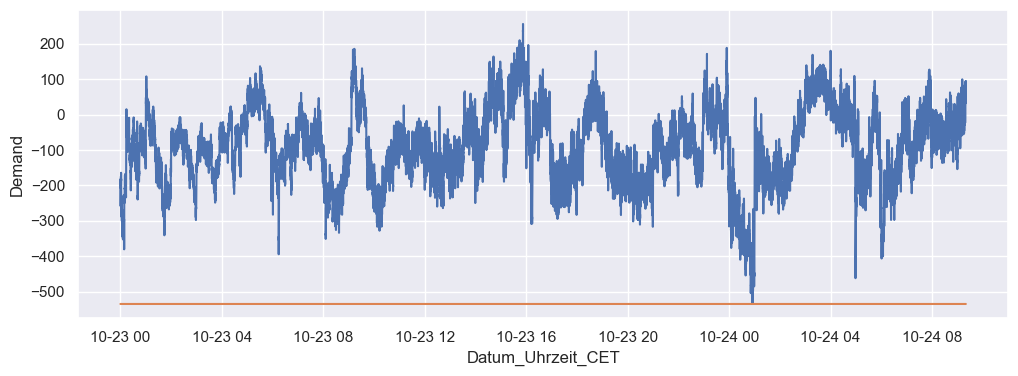

1


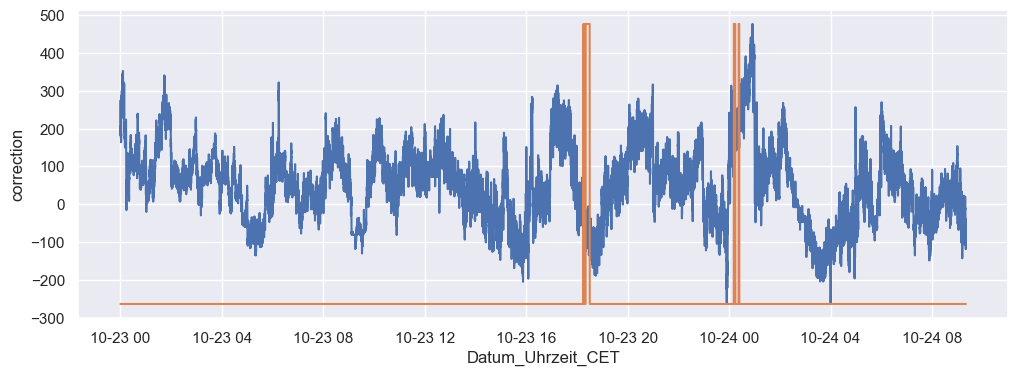

2


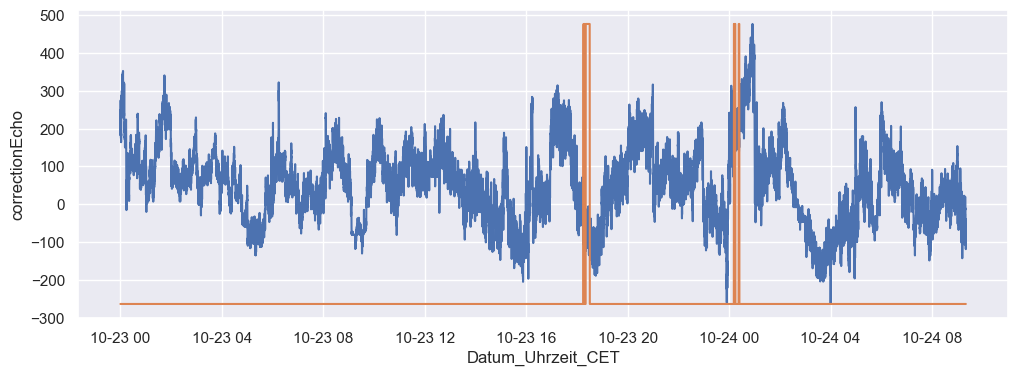

3


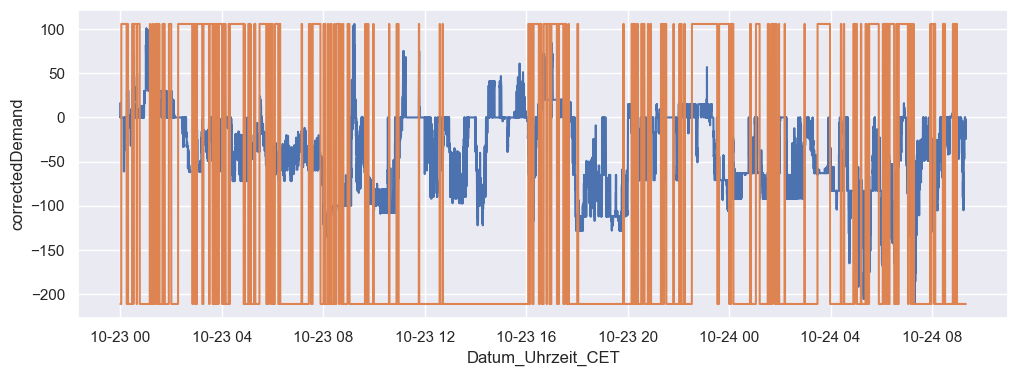

4


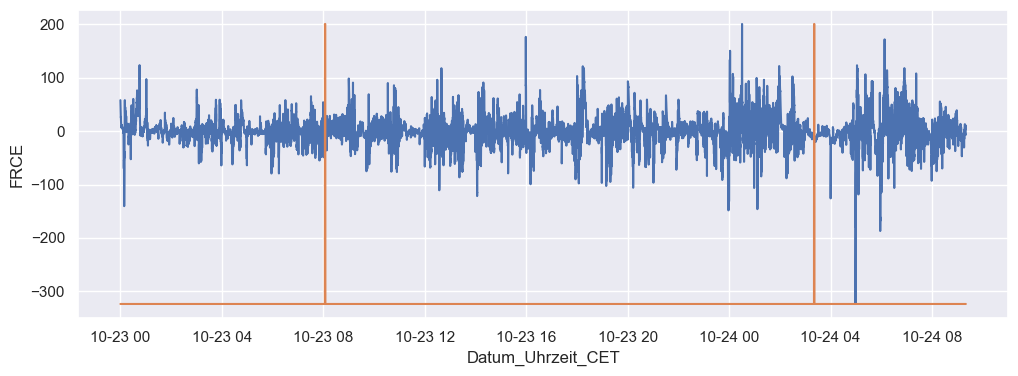

5


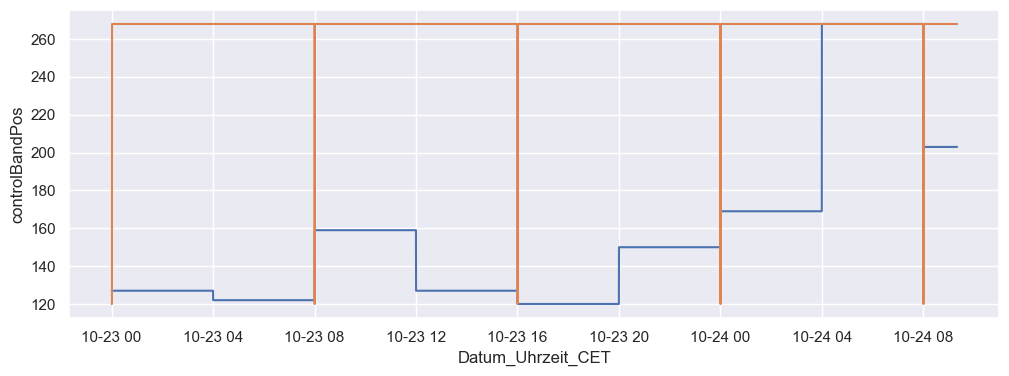

6


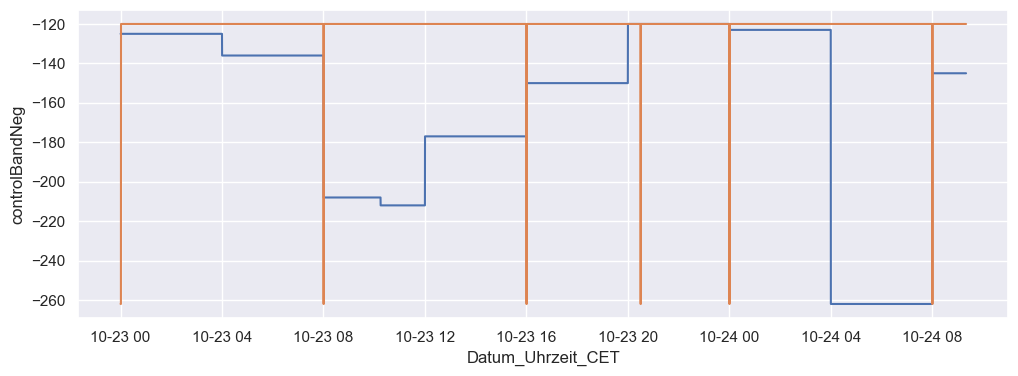

7


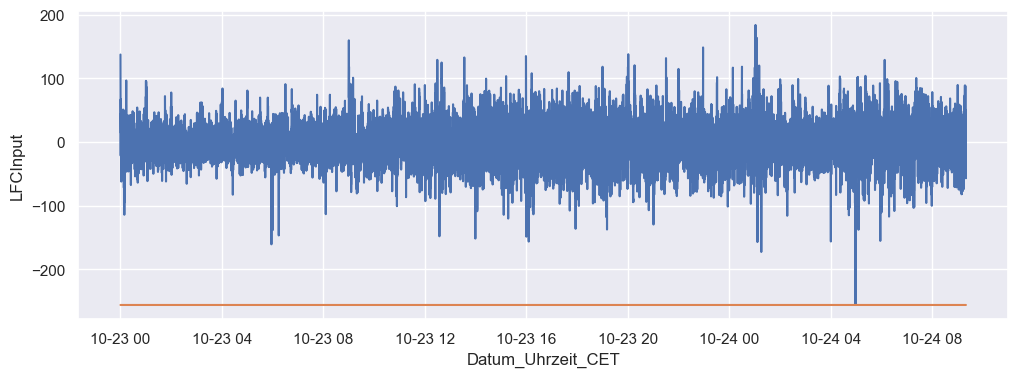

8


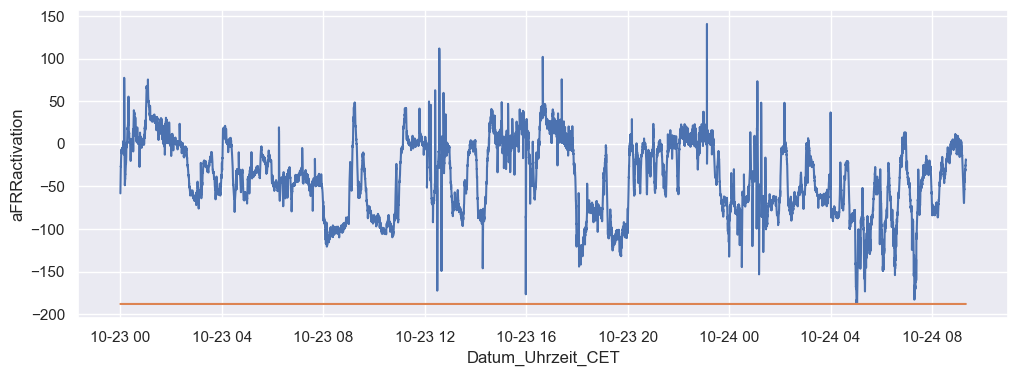

9


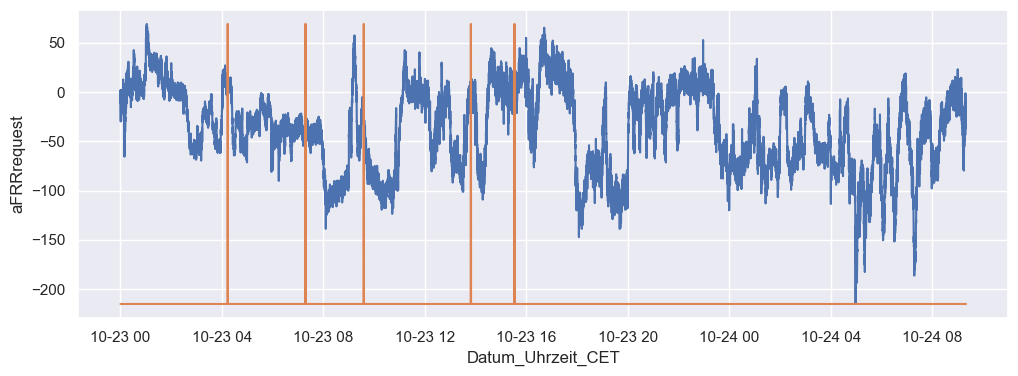

10


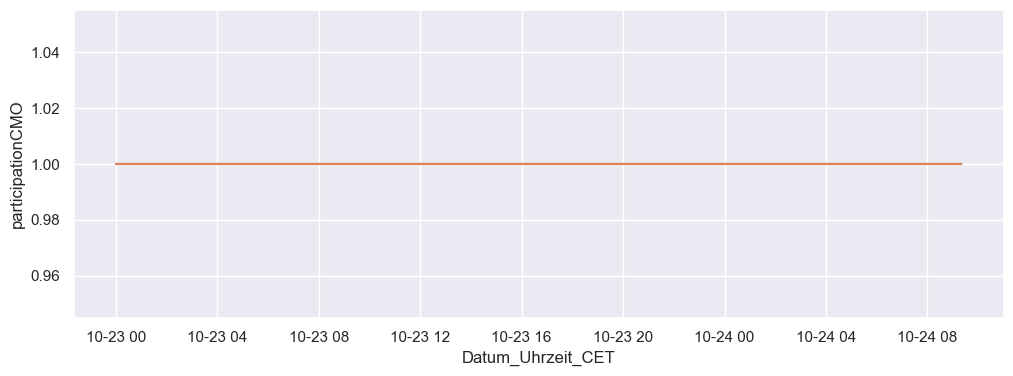

11


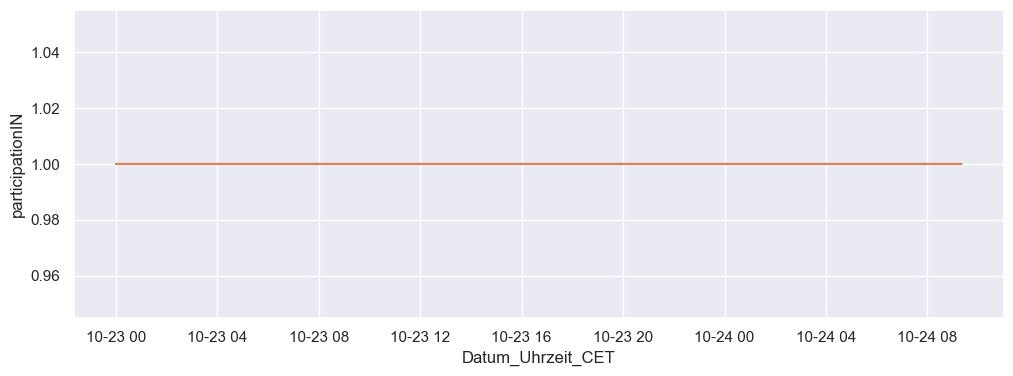

12


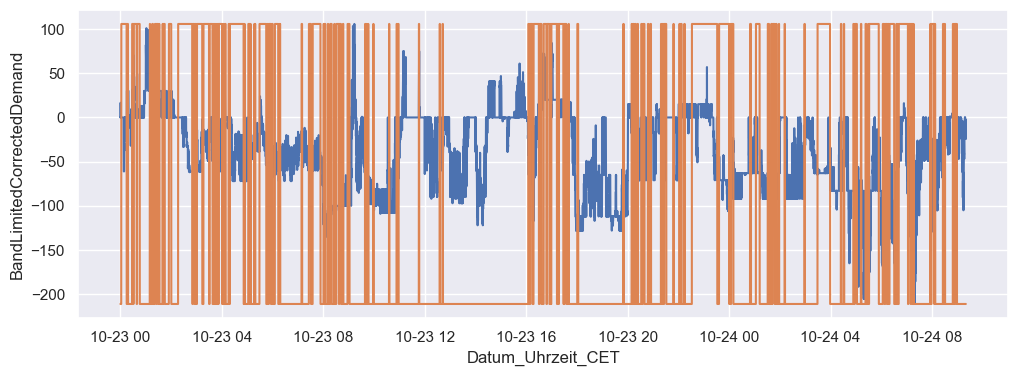

In [7]:

# Create subplots with shared x-axis
#fig = make_subplots(rows=len(features), shared_xaxes=True, vertical_spacing=1 / (len(features) - 1))

sns.set(rc={'figure.figsize': (12, 4)})

for i, feature in enumerate(features):
    print(i)
    fig, ax = plt.subplots()
    sns.lineplot(x="Datum_Uhrzeit_CET", y=feature[0], data=area_subset_train, ax=ax)
    
    #fig = px.line(area_subset_train, x="Datum_Uhrzeit_CET", y=feature, title=feature)
    # fig.add_trace(go.Scatter(x=area_subset_train["Datum_Uhrzeit_CET"], 
    #                 y=area_subset_train[feature], 
    #                 mode='lines', name=feature),                     
    #                 row=i+1, col=1)
    
    y_min = np.min(area_subset_train[feature[0]])
    y_max = np.max(area_subset_train[feature[0]])
    bool_signal_plot_y = np.where(area_subset_train[feature[0]+'_frozen'], 
                                  y_max, y_min)
    sns.lineplot(x="Datum_Uhrzeit_CET", y=bool_signal_plot_y, 
                 data=area_subset_train, 
                 ax=ax)
    # bool_plot = go.Scatter(x=area_subset_train['Datum_Uhrzeit_CET'], 
    #                        y=bool_signal_plot_y, 
    #                         fill='tozeroy', 
    #                         mode='none', name='Boolean Signal',
    #                         fillcolor='rgba(255, 0, 0, 0.5)') 
    # fig.add_trace(bool_plot)#, row=i+1, col=1)
    # fig.show()
    plt.show()



In [ ]:
# def plot_freeze(fig, frozen: pd.Series):   
#     for i in range(len(frozen)):
#         if frozen.iloc[i]:
#             # Find the start and end of the frozen period
#             start = frozen.index[i]
#             while i < len(frozen) and frozen[i]:
#                 i += 1
#             end = frozen.index[i - 1]

            # Add a filled area for this frozen period
            # traces.append(go.Scatter(x=[start, end, end, start, start], 
            #                          y=[0, 0, signal.max(), signal.max(), 0], 
            #                          fill='toself', 
            #                          fillcolor='red', 
            #                          opacity=0.2, 
            #                          line=dict(color='transparent'),
            #                          showlegend=False))
